## 32. 多層パーセプトロン（MLP : Multi-layer Perceptron）

### <font color = blue>**1.** </font> ライブラリのサンプルコード

https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html

#### <font color = green> **1.1.** </font> 公式サンプルコードその１

In [ ]:
from sklearn.neural_network import MLPClassifier

from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

In [ ]:
X, y = make_classification(n_samples=100, random_state=1)

In [ ]:
X.shape

In [ ]:
X[0]

In [ ]:
y.shape

In [ ]:
y

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=1)

In [ ]:
clf = MLPClassifier(random_state=1, max_iter=300).fit(X_train, y_train)

In [ ]:
clf.predict_proba(X_test[:1])

In [ ]:
clf.predict(X_test[:5, :])

In [ ]:
clf.score(X_test, y_test)

#### <font color = green> **1.2.** </font> 公式サンプルコードその２

In [ ]:
from sklearn.neural_network import MLPClassifier

In [ ]:
X = [[0., 0.], [1., 1.]]
y = [0, 1]

In [ ]:
clf = MLPClassifier(solver='lbfgs',
                    alpha=1e-5, ####
                    hidden_layer_sizes=(5, 2),  ####
                    random_state=1)

In [ ]:
clf.fit(X, y)

In [ ]:
clf.predict([[2., 2.], [-1., -2.]])

In [ ]:
# the weight matrices that constitute the model parameters
[coef.shape for coef in clf.coefs_]

In [ ]:
# the Cross-Entropy loss function
clf.predict_proba([[2., 2.], [1., 2.]])

In [ ]:
## the model supports multi-label classification

In [ ]:
X = [[0., 0.], [1., 1.]]
y = [[0, 1], [1, 1]]

In [ ]:
clf = MLPClassifier(solver='lbfgs',
                    alpha=1e-5, ####
                    hidden_layer_sizes=(15,), ####
                    random_state=1)

In [ ]:
clf.fit(X, y)

In [ ]:
clf.predict([[1., 2.]])

In [ ]:
clf.predict([[0., 0.]])

#### <font color = green> **1.3.** </font> MNIST（エムニスト : 手書き数字の画像のデータセット）を使用したサンプルコード

https://scikit-learn.org/stable/auto_examples/neural_networks/plot_mnist_filters.html

In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.exceptions import ConvergenceWarning
from sklearn.neural_network import MLPClassifier

# import warnings
# import time

In [ ]:
# Load data from https://www.openml.org/d/554

X, y = fetch_openml('mnist_784', version=1, return_X_y=True)

## 30秒くらいかかる

In [ ]:
X.shape

In [ ]:
# 28*28 = 784

In [ ]:
plt.matshow(X[0].reshape(28,28), cmap='binary')
plt.show()

In [ ]:
plt.matshow(X[1].reshape(28,28), cmap='binary')
plt.show()

In [ ]:
plt.matshow(X[2].reshape(28,28), cmap='binary')
plt.show()

In [ ]:
X[0][150:200]

In [ ]:
X = X / 255.

In [ ]:
# rescale the data, use the traditional train/test split
X_train, X_test = X[:60000], X[60000:]
y_train, y_test = y[:60000], y[60000:]

In [ ]:
mlp = MLPClassifier(hidden_layer_sizes=(500,), #### (50,) -> (500,)
                    max_iter=1000,  ####  10 -> 1000
                    alpha=1e-4, ####
                    solver='sgd', verbose=10, random_state=1,
                    learning_rate_init=.1)

In [ ]:
mlp.fit(X_train, y_train)

## 4分くらいかかる

In [ ]:
print("Training set score: %f" % mlp.score(X_train, y_train))
print("Test set score: %f" % mlp.score(X_test, y_test))

In [ ]:
print(type(mlp.coefs_))
print(len(mlp.coefs_))

In [ ]:
mlp.coefs_[0].shape

In [ ]:
mlp.coefs_[1].shape

In [ ]:
# use global min / max to ensure all weights are shown on the same scale
vmin, vmax = mlp.coefs_[0].min(), mlp.coefs_[0].max()

In [ ]:
fig, axes = plt.subplots(8, 8, figsize=(12,12))

for coef, ax in zip(mlp.coefs_[0].T, axes.ravel()):
  ax.matshow(coef.reshape(28, 28), cmap=plt.cm.gray, vmin=.5 * vmin, vmax=.5 * vmax)
  ax.set_xticks(())
  ax.set_yticks(())

plt.show()

In [ ]:
plt.matshow(mlp.coefs_[0].T[0].reshape(28,28), cmap=plt.cm.gray, vmin=.5 * vmin, vmax=.5 * vmax)

In [ ]:
index = 102 ###

plt.matshow(X_test[index].reshape(28,28), cmap='binary')
print(mlp.predict(X_test[index].reshape(-1,28*28)))

#### <font color = green> **1.4.** </font> 自作お絵描きデータをモデルに突っ込んで遊ぶ

In [ ]:
import numpy as np
own_data = np.array([
            [0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0],
            [0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0],
            [0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0],
            [0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0],
            [0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0],
            [0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0],
            [0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0],
            [0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0],
            [0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0],
            [0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0],
            [0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0],
            [0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0],
            [0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0],
            [0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0],
            [0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0],
            [0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0],
            [0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0],
            [0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0],
            [0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0],
            [0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0],
            [0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0],
            [0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0],
            [0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0],
            [0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0],
            [0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0],
            [0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0],
            [0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0],
            [0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0],])

plt.matshow(own_data.reshape(28,28), cmap='binary')
print(mlp.predict(own_data.reshape(-1,28*28)))

#### <font color = green> **1.5.** </font> 隠れ層をいじって遊ぶ

In [ ]:
hiddenLayer = (50, 10, 5, 10, 50)  ####

mlp2 = MLPClassifier(hidden_layer_sizes=hiddenLayer,
                    max_iter=10,  ####
                    alpha=1e-4, ####
                    solver='sgd', verbose=10, random_state=1,
                    learning_rate_init=.1)

In [ ]:
mlp2.fit(X_train, y_train)

In [ ]:
print("Training set score: %f" % mlp2.score(X_train, y_train))
print("Test set score: %f" % mlp2.score(X_test, y_test))

In [ ]:
print(type(mlp2.coefs_))
print(len(mlp2.coefs_))

In [ ]:
print(mlp2.coefs_[0].shape)
print(mlp2.coefs_[1].shape)
print(mlp2.coefs_[2].shape)
print(mlp2.coefs_[3].shape)
print(mlp2.coefs_[4].shape)
print(mlp2.coefs_[5].shape)

### <font color = blue>**2.** </font> 隠れ層の　層数／パラメータ数　による影響
（公式サンプルコードを改変）

In [ ]:
# Code source: Gaël Varoquaux
#              Andreas Müller
# Modified for documentation by Jaques Grobler
# License: BSD 3 clause

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification

'''from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
'''

from sklearn.neural_network import MLPClassifier

In [ ]:
h = .02  # step size in the mesh

In [ ]:
X, y = make_classification(n_features=2, n_redundant=0, n_informative=2,
                           random_state=1, n_clusters_per_class=1)

rng = np.random.RandomState(2)

X += 2 * rng.uniform(size=X.shape)

linearly_separable = (X, y)

In [ ]:
datasets = [make_moons(noise=0.3, random_state=0),
            make_circles(noise=0.2, factor=0.5, random_state=1),
            linearly_separable]

In [ ]:
##########

hidLayer_list = [(10,),
                 (10, 10,),
                 (10, 10, 10,),
                 (10, 10, 10, 10,),
                 (10, 10, 10, 10, 10,)]

##########

In [ ]:
classifiers = [MLPClassifier(alpha=1, max_iter=1000, hidden_layer_sizes=k) for k in hidLayer_list]

In [ ]:
figure = plt.figure(figsize=(18, 9))
i = 1
# iterate over datasets
for ds_cnt, ds in enumerate(datasets):
  # preprocess dataset, split into training and test part
  X, y = ds
  X = StandardScaler().fit_transform(X)
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4, random_state=42)

  x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
  y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
  xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

  # just plot the dataset first
  cm = plt.cm.RdBu
  cm_bright = ListedColormap(['#FF0000', '#0000FF'])
  ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
  if ds_cnt == 0:
    ax.set_title("Input data")
  # Plot the training points
  ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors='k')
  # Plot the testing points
  ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6, edgecolors='k')
  ax.set_xlim(xx.min(), xx.max())
  ax.set_ylim(yy.min(), yy.max())
  ax.set_xticks(())
  ax.set_yticks(())
  i += 1

  # iterate over classifiers
  for name, clf in zip(hidLayer_list, classifiers):
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    clf.fit(X_train, y_train)
    score = clf.score(X_test, y_test)

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    if hasattr(clf, "decision_function"):
      Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
    else:
      Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)

    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors='k')
    # Plot the testing points
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, edgecolors='k', alpha=0.6)

    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    if ds_cnt == 0:
      ax.set_title(name)
    ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'), size=15, horizontalalignment='right')
    i += 1

plt.tight_layout()
plt.show()

### <font color = blue>**3.** </font> 正則化パラメータによる影響
（公式サンプルコード）

https://scikit-learn.org/stable/auto_examples/neural_networks/plot_mlp_alpha.html

In [ ]:
# Author: Issam H. Laradji
# License: BSD 3 clause

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import make_pipeline

In [ ]:
h = .02  # step size in the mesh

In [ ]:
X, y = make_classification(n_features=2, n_redundant=0, n_informative=2,
                           random_state=0, n_clusters_per_class=1)

rng = np.random.RandomState(2)

X += 2 * rng.uniform(size=X.shape)

linearly_separable = (X, y)

In [ ]:
datasets = [make_moons(noise=0.3, random_state=0),
            make_circles(noise=0.2, factor=0.5, random_state=1),
            linearly_separable]

In [ ]:
##########

alphas = np.logspace(-1, 1, 5)

##########

In [ ]:
classifiers = []
names = []
for alpha in alphas:
  classifiers.append(make_pipeline(StandardScaler(),
                                   MLPClassifier(solver='lbfgs',
                                                 alpha=alpha,
                                                 random_state=1,
                                                 max_iter=2000,
                                                 early_stopping=True,
                                                 hidden_layer_sizes=[100, 100])))
  names.append(f"alpha {alpha:.2f}")

In [ ]:
figure = plt.figure(figsize=(17, 9))
i = 1
# iterate over datasets
for X, y in datasets:
  # split into training and test part
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4)
  x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
  y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
  xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

  # just plot the dataset first
  cm = plt.cm.RdBu
  cm_bright = ListedColormap(['#FF0000', '#0000FF'])
  ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
  # Plot the training points
  ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright)
  # and testing points
  ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6)
  ax.set_xlim(xx.min(), xx.max())
  ax.set_ylim(yy.min(), yy.max())
  ax.set_xticks(())
  ax.set_yticks(())
  i += 1

  # iterate over classifiers
  for name, clf in zip(names, classifiers):
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    clf.fit(X_train, y_train)
    score = clf.score(X_test, y_test)

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max] x [y_min, y_max].
    if hasattr(clf, "decision_function"):
      Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
    else:
      Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)

    # Plot also the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors='black', s=25)
    # and testing points
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6, edgecolors='black', s=25)

    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(name)
    ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'), size=15, horizontalalignment='right')
    i += 1

figure.subplots_adjust(left=.02, right=.98)
plt.show()

## 33. keras を使ったネットワーク構築

https://keras.io/getting_started/

ライブラリとしての keras 自体のチュートリアルはこちら

- Introduction to Keras for engineers
  - https://keras.io/getting_started/intro_to_keras_for_engineers/
- Introduction to Keras for Researchers
  - https://keras.io/getting_started/intro_to_keras_for_researchers/

### <font color = blue>**1.** </font> 初歩的なネットワーク

#### <font color = green> **1.1.** </font> 学習用データの用意（MNIST）

In [1]:
from tensorflow.keras.datasets import mnist

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [12]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [13]:
x_train, x_test = x_train / 255., x_test / 255.

In [4]:
pd.options.display.max_columns = 28

In [5]:
test_number = x_train[153]  ####

In [6]:
test_number_image = test_number.reshape(28,28)
 
number_matrix = pd.DataFrame(test_number_image)

In [ ]:
plt.figure(figsize=(15,15))
sns.heatmap(number_matrix, annot=True, square=True,vmin=0,vmax=1, fmt='.2f', cmap='Greys') 
plt.show()

#### <font color = green> **1.2.** </font> Sequential を使った構築

In [7]:
from tensorflow import keras

In [ ]:
model = keras.Sequential([
                          # 入力層
                          keras.layers.Flatten(input_shape=(28, 28)),

                          # 第１層
                          keras.layers.Dense(1000),
                          keras.layers.Activation(keras.activations.relu),

                          # 第２層
                          keras.layers.Dense(100),
                          keras.layers.Activation(keras.activations.relu),

                          # 出力層
                          keras.layers.Dense(10, activation='softmax')
                          ])

In [ ]:
keras.utils.plot_model(model, show_shapes=True)

In [ ]:
loss_fn = keras.losses.SparseCategoricalCrossentropy(from_logits=True)
model.compile(optimizer='adam',
              loss=loss_fn,
              metrics=['accuracy'])

In [ ]:
fitting = model.fit(x_train, y_train,
                    epochs=10,  ####
                    validation_data=(x_test,y_test))

# １エポック18秒前後、１０エポックで計3分前後かかる

In [ ]:
plt.figure(figsize=(9,6))
plt.plot(fitting.history['accuracy'], c='b')
plt.plot(fitting.history['val_accuracy'], c='r')
plt.show()

In [ ]:
plt.figure(figsize=(9,6))
plt.plot(fitting.history['loss'], c='b')
plt.plot(fitting.history['val_loss'], c='r')
plt.show()

#### <font color = green> **1.3.** </font> **1.2.** にバッチ正規化を追加

In [ ]:
model2 = keras.Sequential([
                          # 入力層
                          keras.layers.Flatten(input_shape=(28, 28)),

                          # 第１層
                          keras.layers.Dense(1000),
                          keras.layers.BatchNormalization(),  ###
                          keras.layers.Activation(keras.activations.relu),

                          # 第２層
                          keras.layers.Dense(100),
                          keras.layers.BatchNormalization(),  ###
                          keras.layers.Activation(keras.activations.relu),

                          # 出力層
                          keras.layers.Dense(10, activation='softmax')
                          ])

In [ ]:
keras.utils.plot_model(model2, show_shapes=True)

In [ ]:
loss_fn = keras.losses.SparseCategoricalCrossentropy(from_logits=True)
model2.compile(optimizer='adam',
              loss=loss_fn,
              metrics=['accuracy'])

In [ ]:
fitting2 = model2.fit(x_train, y_train,
                    epochs=10,  ####
                    validation_data=(x_test,y_test))

# １エポック20秒前後、１０エポックで計3分超かかる

In [ ]:
plt.figure(figsize=(9,6))
plt.plot(fitting2.history['accuracy'], c='b')
plt.plot(fitting2.history['val_accuracy'], c='r')
plt.show()

In [ ]:
plt.figure(figsize=(9,6))
plt.plot(fitting2.history['loss'], c='b')
plt.plot(fitting2.history['val_loss'], c='r')
plt.show()

#### <font color = green> **1.4.** </font> .add を使った構築

In [8]:
from tensorflow.keras import layers, models

In [ ]:
model3 = models.Sequential()

# 入力層
model3.add(layers.Flatten(input_shape=(28, 28)))

# 第１層
model3.add(layers.Dense(1000, activation='relu'))

# 第２層
model3.add(layers.Dense(100, activation='relu'))

# 出力層
model3.add(layers.Dense(10, activation='softmax'))

In [ ]:
keras.utils.plot_model(model3, show_shapes=True)

In [ ]:
loss_fn = keras.losses.SparseCategoricalCrossentropy(from_logits=True)
model3.compile(optimizer='adam',
               loss=loss_fn,
               metrics=['accuracy'])

In [ ]:
fitting3 = model3.fit(x_train, y_train,
                      epochs=10,  ####
                      validation_data=(x_test,y_test))

# １エポック18秒前後、１０エポックで計3分前後かかる

In [ ]:
plt.figure(figsize=(9,6))
plt.plot(fitting3.history['accuracy'], c='b')
plt.plot(fitting3.history['val_accuracy'], c='r')
plt.show()

In [ ]:
plt.figure(figsize=(9,6))
plt.plot(fitting3.history['loss'], c='b')
plt.plot(fitting3.history['val_loss'], c='r')
plt.show()

#### <font color = green> **1.5.** </font> 過程全てをオブジェクト化した構築
（ラベルデータの整形が必要）

In [14]:
num_classes = 10
y_train_vector = keras.utils.to_categorical(y_train, num_classes)
y_test_vector = keras.utils.to_categorical(y_test, num_classes)

In [10]:
# 入力層
inputs = layers.Input(shape=(28, 28))
flatten = layers.Flatten()(inputs)

# 第１層
dense1 = layers.Dense(1000)(flatten)
activation1 = layers.Activation(keras.activations.relu)(dense1)

# 第２層
dense2 = layers.Dense(100)(activation1)
activation2 = layers.Activation(keras.activations.relu)(dense2)

# 出力層
outputs = layers.Dense(10, activation='softmax')(activation2)

model4 = keras.Model(inputs=inputs, outputs=outputs)

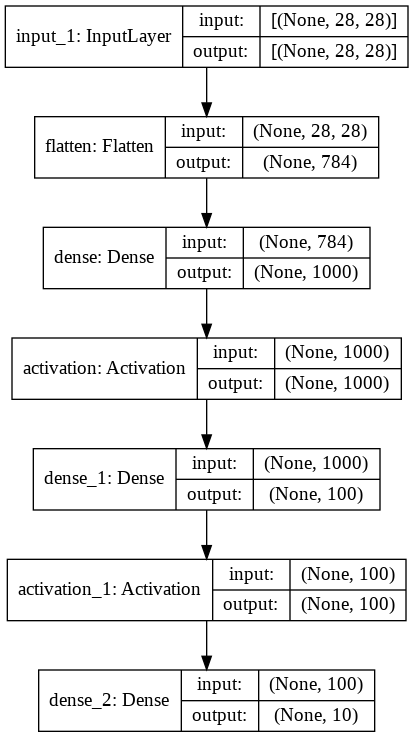

In [11]:
keras.utils.plot_model(model4, show_shapes=True)

In [15]:
model4.compile(optimizer='adam',
               loss='categorical_crossentropy',
               metrics=['accuracy'])

In [16]:
fitting4 = model4.fit(x_train, y_train_vector,
                      epochs=10,  ####
                      validation_data=(x_test,y_test_vector))

# １エポック18秒前後、１０エポックで計3分前後かかる

Epoch 1/10
1875/1875 [==============================] - 18s 9ms/step - loss: 0.3120 - accuracy: 0.9065 - val_loss: 0.0990 - val_accuracy: 0.9703
Epoch 2/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0778 - accuracy: 0.9755 - val_loss: 0.0931 - val_accuracy: 0.9714
Epoch 3/10
1875/1875 [==============================] - 16s 9ms/step - loss: 0.0523 - accuracy: 0.9832 - val_loss: 0.0785 - val_accuracy: 0.9777
Epoch 4/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0342 - accuracy: 0.9893 - val_loss: 0.0667 - val_accuracy: 0.9816
Epoch 5/10
1875/1875 [==============================] - 18s 10ms/step - loss: 0.0295 - accuracy: 0.9905 - val_loss: 0.0752 - val_accuracy: 0.9775
Epoch 6/10
1875/1875 [==============================] - 18s 9ms/step - loss: 0.0226 - accuracy: 0.9926 - val_loss: 0.0784 - val_accuracy: 0.9812
Epoch 7/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0201 - accuracy: 0.9936 - val_loss: 0.0731 - val_a

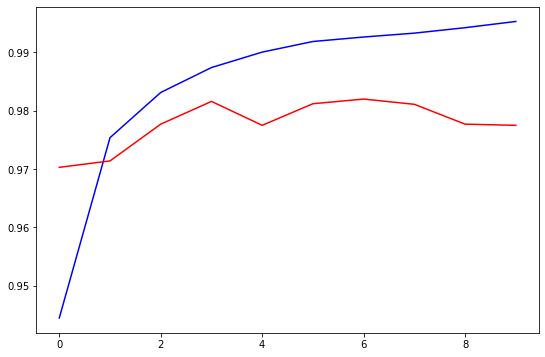

In [17]:
plt.figure(figsize=(9,6))
plt.plot(fitting4.history['accuracy'], c='b')
plt.plot(fitting4.history['val_accuracy'], c='r')
plt.show()

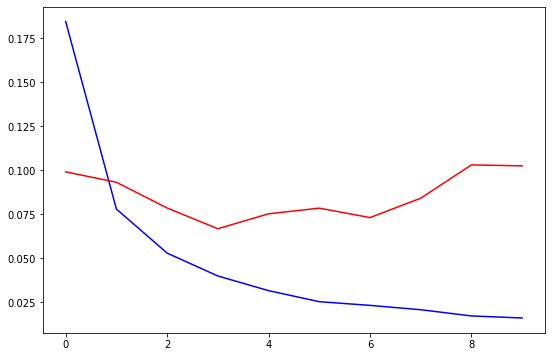

In [18]:
plt.figure(figsize=(9,6))
plt.plot(fitting4.history['loss'], c='b')
plt.plot(fitting4.history['val_loss'], c='r')
plt.show()

#### <font color = green> **1.6.** </font> **1.5.** にバッチ正規化を追加

In [20]:
# 入力層
inputs = layers.Input(shape=(28, 28))
flatten = layers.Flatten()(inputs)

# 第１層
dense1 = layers.Dense(1000)(flatten)
batch1 = layers.BatchNormalization()(dense1)
activation1 = layers.Activation(keras.activations.relu)(batch1)

# 第２層
dense2 = layers.Dense(100)(activation1)
batch2 = layers.BatchNormalization()(dense2)
activation2 = layers.Activation(keras.activations.relu)(batch2)

# 出力層
outputs = layers.Dense(10, activation='softmax')(activation2)

model4_ = keras.Model(inputs=inputs, outputs=outputs)

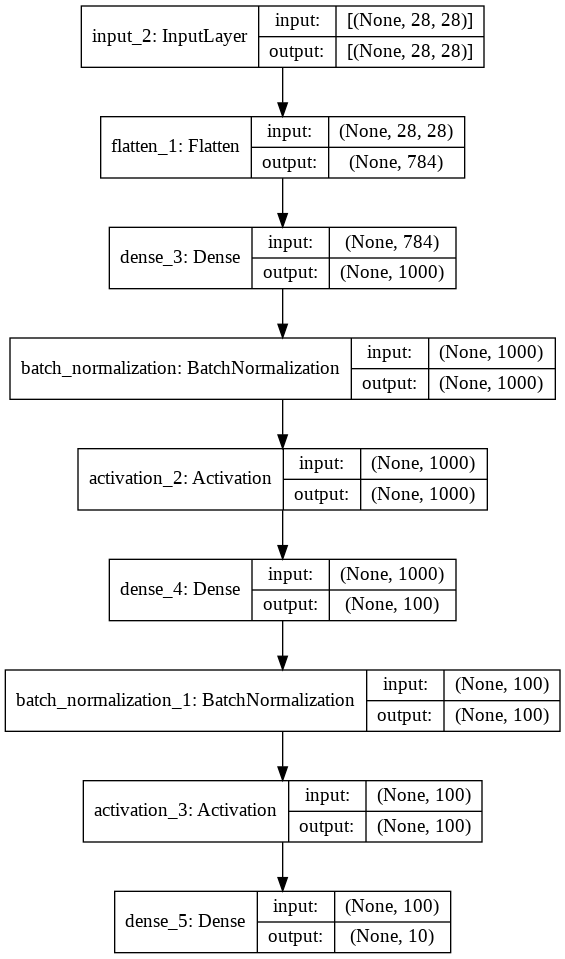

In [21]:
keras.utils.plot_model(model4_, show_shapes=True)

In [22]:
model4_.compile(optimizer='adam',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

In [23]:
fitting4_ = model4_.fit(x_train, y_train_vector,
                        epochs=10,  ####
                        validation_data=(x_test,y_test_vector))

# １エポック20秒前後、１０エポックで計3分半くらいかかる

Epoch 1/10
1875/1875 [==============================] - 20s 10ms/step - loss: 0.3003 - accuracy: 0.9115 - val_loss: 0.1149 - val_accuracy: 0.9636
Epoch 2/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.1025 - accuracy: 0.9686 - val_loss: 0.0761 - val_accuracy: 0.9758
Epoch 3/10
1875/1875 [==============================] - 20s 11ms/step - loss: 0.0680 - accuracy: 0.9784 - val_loss: 0.0705 - val_accuracy: 0.9768
Epoch 4/10
1875/1875 [==============================] - 20s 11ms/step - loss: 0.0495 - accuracy: 0.9837 - val_loss: 0.0591 - val_accuracy: 0.9810
Epoch 5/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0421 - accuracy: 0.9866 - val_loss: 0.0579 - val_accuracy: 0.9819
Epoch 6/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0354 - accuracy: 0.9885 - val_loss: 0.0620 - val_accuracy: 0.9817
Epoch 7/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0276 - accuracy: 0.9906 - val_loss: 0.0648 -

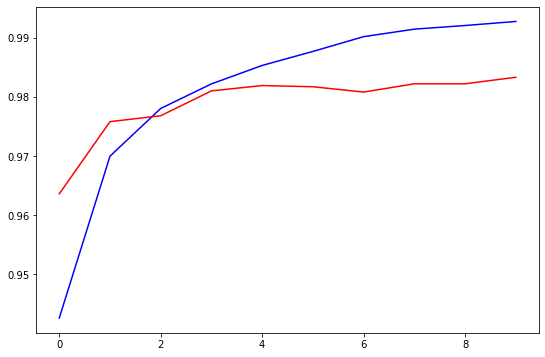

In [25]:
plt.figure(figsize=(9,6))
plt.plot(fitting4_.history['accuracy'], c='b')
plt.plot(fitting4_.history['val_accuracy'], c='r')
plt.show()

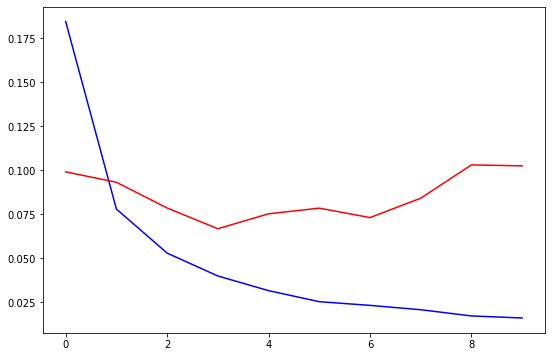

In [ ]:
plt.figure(figsize=(9,6))
plt.plot(fitting4_.history['loss'], c='b')
plt.plot(fitting4_.history['val_loss'], c='r')
plt.show()

### <font color = blue>**2.** </font> ドロップアウト

#### <font color = green> **2.1.** </font> Sequential を使った構築

In [ ]:
model5 = keras.Sequential([
                           # 入力層
                           layers.Flatten(input_shape=(28, 28)),

                           # 第１層
                           layers.Dense(1000),
                           layers.Activation(keras.activations.relu),
                           layers.Dropout(0.2), ####

                           # 第２層
                           layers.Dense(100),
                           layers.Activation(keras.activations.relu),
                           layers.Dropout(0.2), ####

                           # 出力層
                           layers.Dense(10, activation='softmax')
                           ])

In [ ]:
keras.utils.plot_model(model5, show_shapes=True)

In [ ]:
loss_fn = keras.losses.SparseCategoricalCrossentropy(from_logits=True)
model5.compile(optimizer='adam',
               loss=loss_fn,
               metrics=['accuracy'])

In [ ]:
fitting5 = model5.fit(x_train, y_train,
                      epochs=10,  ####
                      validation_data=(x_test,y_test))

# １エポック19秒前後、１０エポックで計3分超かかる

In [ ]:
plt.figure(figsize=(9,6))
plt.plot(fitting5.history['accuracy'], c='b')
plt.plot(fitting5.history['val_accuracy'], c='r')
plt.show()

In [ ]:
plt.figure(figsize=(9,6))
plt.plot(fitting5.history['loss'], c='b')
plt.plot(fitting5.history['val_loss'], c='r')
plt.show()

#### <font color = green> **2.2.** </font> 過程全てをオブジェクト化した構築

In [ ]:
# 入力層
inputs = layers.Input(shape=(28, 28))
flatten = layers.Flatten()(inputs)

# 第１層
dense1 = layers.Dense(1000)(flatten)
activation1 = layers.Activation(keras.activations.relu)(dense1)
dropout1 = layers.Dropout(0.2)(activation1) ####

# 第２層
dense2 = layers.Dense(100)(dropout1)
activation2 = layers.Activation(keras.activations.relu)(dense2)
dropout2 = layers.Dropout(0.2)(activation2) ####

# 出力層
outputs = layers.Dense(10, activation='softmax')(dropout2)

model6 = keras.Model(inputs=inputs, outputs=outputs)

In [ ]:
keras.utils.plot_model(model6, show_shapes=True)

In [ ]:
loss_fn = keras.losses.SparseCategoricalCrossentropy(from_logits=True)
model6.compile(optimizer='adam',
               loss=loss_fn,
               metrics=['accuracy'])

In [ ]:
fitting6 = model6.fit(x_train, y_train,
                      epochs=10,  ####
                      validation_data=(x_test,y_test))

# １エポック19秒前後、１０エポックで計3分超かかる

In [ ]:
plt.figure(figsize=(9,6))
plt.plot(fitting6.history['accuracy'], c='b')
plt.plot(fitting6.history['val_accuracy'], c='r')
plt.show()

In [ ]:
plt.figure(figsize=(9,6))
plt.plot(fitting6.history['loss'], c='b')
plt.plot(fitting6.history['val_loss'], c='r')
plt.show()

### <font color = blue>**3.** </font> ResNet : Residual Network

In [ ]:
# 入力層
inputs = layers.Input(shape=(28,28))
flatten = layers.Flatten()(inputs)

# 第１層
dense1 = layers.Dense(1000)(flatten)
activation1 = layers.Activation(keras.activations.relu)(dense1)
dropout1 = layers.Dropout(0.2)(activation1)

# 第２層
dense2 = layers.Dense(100)(dropout1)
activation2 = layers.Activation(keras.activations.relu)(dense2)
dropout2 = layers.Dropout(0.2)(activation2)

# 第１層の出口と第2層の出口を合流
merged = layers.concatenate([dropout1, dropout2])

# 出力層
outputs = layers.Dense(10, activation='softmax')(merged)

RN = keras.Model(inputs=inputs, outputs=outputs)

In [ ]:
keras.utils.plot_model(RN, show_shapes=True)

In [ ]:
RN.compile(optimizer='adam',
           loss='categorical_crossentropy',
           metrics=['accuracy'])

In [ ]:
fitting_rn = RN.fit(x_train, y_train_vector,
                      epochs=10,  ####
                      validation_data=(x_test,y_test_vector))

# １エポック19秒前後、１０エポックで計3分超かかる

In [ ]:
plt.figure(figsize=(9,6))
plt.plot(fitting_rn.history['accuracy'], c='b')
plt.plot(fitting_rn.history['val_accuracy'], c='r')
plt.show()

In [ ]:
plt.figure(figsize=(9,6))
plt.plot(fitting_rn.history['loss'], c='b')
plt.plot(fitting_rn.history['val_loss'], c='r')
plt.show()

### <font color = blue>**4.** </font> CNN : Convolutional Neural Network

公式サンプルコードより

Simple MNIST convnet

https://keras.io/examples/vision/mnist_convnet/

In [ ]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
# Model / data parameters
num_classes = 10
input_shape = (28, 28, 1)

In [ ]:
# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

In [ ]:
# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255

In [ ]:
# Make sure images have shape (28, 28, 1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")

In [ ]:
# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [ ]:
model = keras.Sequential(
    [keras.Input(shape=input_shape),
     layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
     layers.MaxPooling2D(pool_size=(2, 2)),
     layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
     layers.MaxPooling2D(pool_size=(2, 2)),
     layers.Flatten(),
     layers.Dropout(0.5),
     layers.Dense(num_classes, activation="softmax"),]
     )

model.summary()

In [ ]:
keras.utils.plot_model(model, show_shapes=True)

In [ ]:
batch_size = 128
epochs = 15

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

# １エポック35秒前後、１5エポックで計9分くらいかかる

In [ ]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])